<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%90_%D0%90_%22%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_8_12_10_12_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%961%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install terra_ai==0.0.0.11

In [2]:
from terra_ai import терра_ии

### 1 Задание №1

1. Создайте копию этого ноутбука, чтобы получить возможность редактировать ячейки
2. Включите поддержку GPU (пункт меню Runtime/Change Runtime type)
3. Загрузите базу автомобилей, состояющуюю из трех марок (для этого воспользуйтесь шаблоном ниже).
4. Постройте архитектуру нейронной сети для распознавания марок машин (аналогичную той, что была на занятии). Обратите внимание, что количество классов в данной задаче равно 3. Значит и количество выходных элементов в последенем полносвязном слое должно равняться 3.
5. Попробуйте добиться точности модели на уровне 70%

In [3]:
# Скачиваем базу автомобилей
терра_ии.загрузить_базу(
    база = 'АВТО-3',
    справка = True
)

Загрузка данных завершена 

Вы скачали базу с изображениями марок автомобилей. 
База состоит из трех марок: Феррари, Мерседес и Рено
Количество изображений в базе: 3429


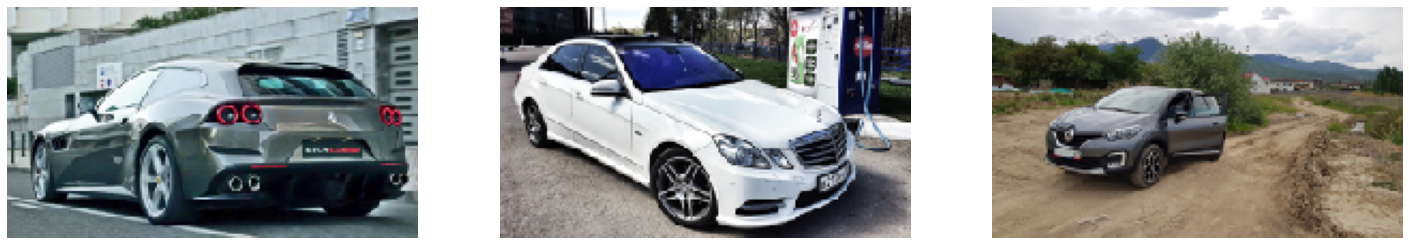

In [4]:
# Примеры из базы
терра_ии.показать_примеры(
    путь='/автомобили')

In [5]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки(
                                                                                                    путь='/автомобили',
                                                                                                    размер = (54, 96))

Созданы выборки: 
Размер сформированного массива x_train: (3086, 54, 96, 3)
Размер сформированного массива y_train: (3086,)
Размер сформированного массива x_train: (341, 54, 96, 3)
Размер сформированного массива y_train: (341,)


In [14]:
слои = 'Сверточный2D-32 Сверточный2D-32 МаксПуллинг\
        Сверточный2D-64 Сверточный2D-64 МаксПуллинг\
         Сверточный2D-64 МаксПуллинг        Выравнивающий\
         Полносвязный-124 Полносвязный-3' # Указываем слои создаваемой модели

# Создаем модель
нейронка_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = терра_ии.инициализировать_под_базу(обучающая_выборка)
    )

Создана модель нейронной сети!


Схема модели:


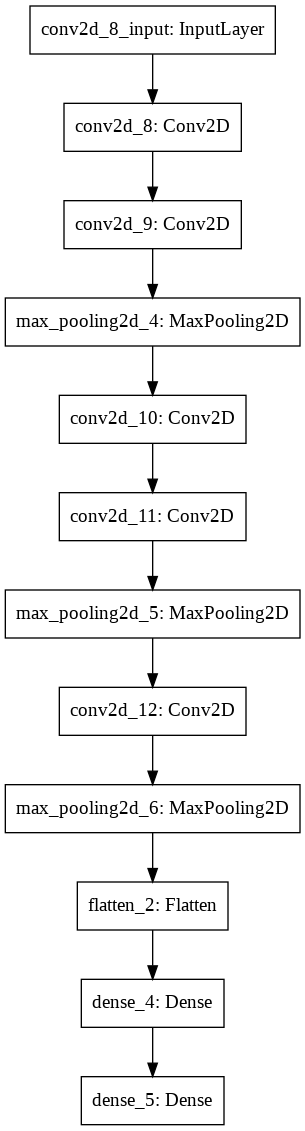

In [15]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка_1)

Эпоха №1  Время обучения: 1.23c  Точность на обучающей выборке: 48.87%       Точность на прверочной выборке: 57.18%
Эпоха №2  Время обучения: 0.64c  Точность на обучающей выборке: 56.09%       Точность на прверочной выборке: 56.3%
Эпоха №3  Время обучения: 0.65c  Точность на обучающей выборке: 57.49%       Точность на прверочной выборке: 61.29%
Эпоха №4  Время обучения: 0.65c  Точность на обучающей выборке: 58.59%       Точность на прверочной выборке: 63.34%
Эпоха №5  Время обучения: 0.64c  Точность на обучающей выборке: 59.79%       Точность на прверочной выборке: 59.53%
Эпоха №6  Время обучения: 0.62c  Точность на обучающей выборке: 61.83%       Точность на прверочной выборке: 59.24%
Эпоха №7  Время обучения: 0.64c  Точность на обучающей выборке: 64.19%       Точность на прверочной выборке: 64.22%
Эпоха №8  Время обучения: 0.65c  Точность на обучающей выборке: 64.0%        Точность на прверочной выборке: 64.81%
Эпоха №9  Время обучения: 0.65c  Точность на обучающей выборке: 66.95%   

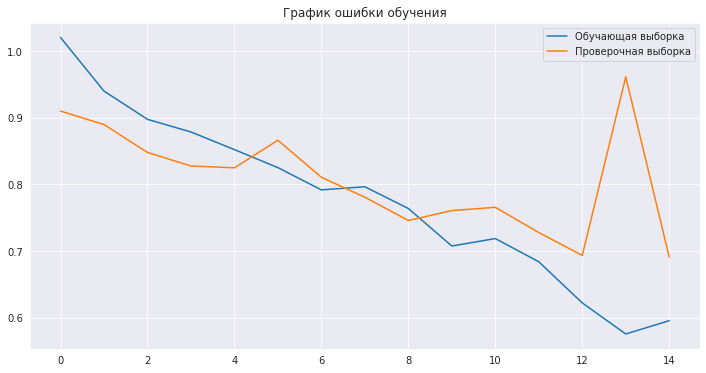

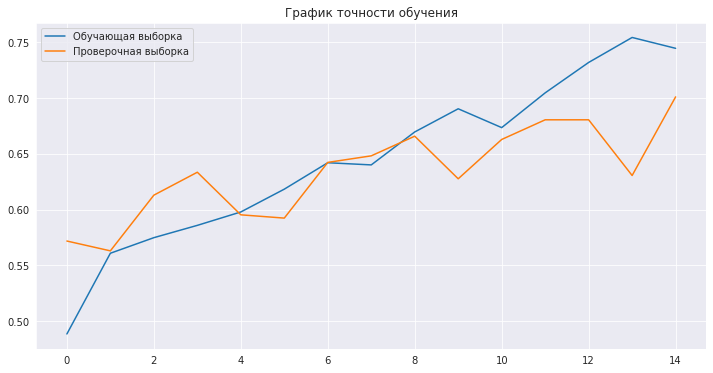

In [16]:
# Обучение модели
# Обучаем модель
терра_ии.обучение_модели(
    нейронка_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 256,
    количество_эпох = 15)

# **[Точность на прверочной выборке: 70.09%]**

Тестовое изображение:


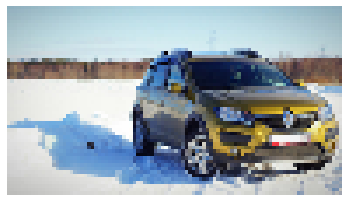


Результат предсказания модели:
Модель распознала модель Феррари на 7.32%
Модель распознала модель Мерседес на 18.22%
Модель распознала модель Рено на 74.46%
---------------------------
Правильный ответ:  Рено
---------------------------



Тестовое изображение:


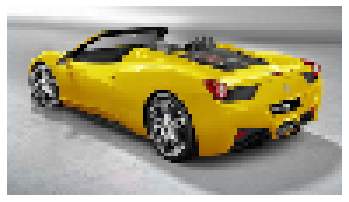


Результат предсказания модели:
Модель распознала модель Феррари на 22.28%
Модель распознала модель Мерседес на 3.94%
Модель распознала модель Рено на 73.78%
---------------------------
Правильный ответ:  Феррари
---------------------------



Тестовое изображение:


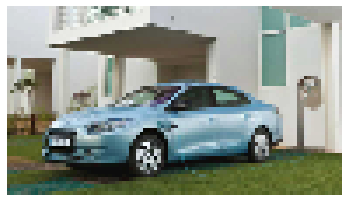


Результат предсказания модели:
Модель распознала модель Феррари на 6.1%
Модель распознала модель Мерседес на 18.93%
Модель распознала модель Рено на 74.97%
---------------------------
Правильный ответ:  Рено
---------------------------



Тестовое изображение:


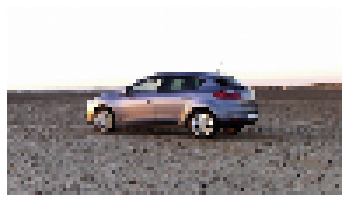


Результат предсказания модели:
Модель распознала модель Феррари на 33.6%
Модель распознала модель Мерседес на 40.49%
Модель распознала модель Рено на 25.91%
---------------------------
Правильный ответ:  Рено
---------------------------





In [17]:
# Тестирование модели
терра_ии.тест_модели(
    нейронка_1,
    тестовый_набор = тестовая_выборка,
    правильные_ответы = метки_тестовой_выборки,
    классы = ['Феррари', 'Мерседес','Рено'],
    количество = 4)

## Задание №2

1. Загрузите базу кожных заболеваний для задачи сегментации (воспользуйтесь шаблоном загрузки ниже)
2. Напишите нейронную сеть, решающую задачу сегментации заболевания (можете использовать различные подходы для создания архитектуры)
3. Протестируйте обученную сеть

In [18]:
# Загружаем базу самолетов
терра_ии.загрузить_базу(
    база = 'КОЖНЫЕ ЗАБОЛЕВАНИЯ',
    справка = True
)

Загрузка данных завершена 

Вы скачали базу кожных заболеваний. 
База состоит из оригинальных изображений и соовтетствующих им размеченных сегментированных изображений.
Количество категорий заболеваний: 10 (Акне, Витилиго, Герпес, Дерматит, Лишай, Невус, Псориаз, Сыпь, Хлоазма, Экзема)
Количество изображений в базе: 981


In [19]:
# Обрабатываем скаченные изображения
изображения, сегментированные_изображения = терра_ии.датасет.обработка_изображений(
    оригиналы = 'diseases/origin',
    сегменты = 'diseases/segmentation',
    классы = ['Акне'],
    размер = (64, 128)
)

Обработка изображений кожных заболеваний (Готово)


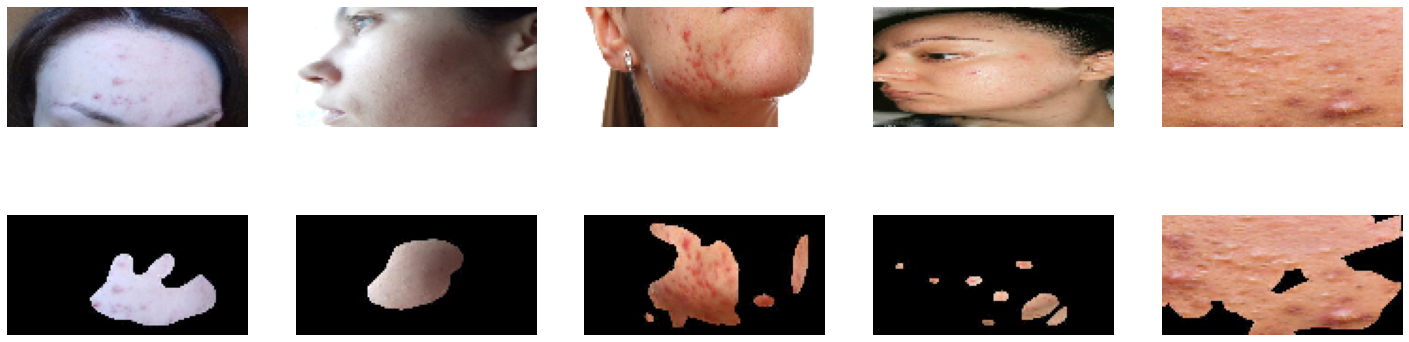

In [20]:
# Примеры изображений
терра_ии.показать_примеры(
    оригиналы = изображения,
    сегментированные_изображения = сегментированные_изображения
)

In [21]:
# Формируем данные для обучения
(обучающая_выборка, размеченная_обучающая_выборка), (тестовая_выборка, размеченная_тестовая_выборка) = терра_ии.создать_выборки_для_сегментации(
    изображения, 
    сегментированные_изображения
)


Данные загружены. Обработано: 510 изображений
Время обработки:  71.57 c


In [30]:
блок_вниз = 'Нормализация Сверточный2D Сверточный2D Сверточный2D Нормализация' # Conv2D Conv2D BatchNormalization
блок_вверх = 'Нормализация Объединение Сверточный2D Нормализация Сверточный2D Нормализация' # BatchNormalization concatenate Conv2D BatchNormalization Conv2D BatchNormalization
нейронка_2 = терра_ии.создать_UNET(
    блок_вниз = блок_вниз,
    блок_вверх = блок_вверх,
    начальное_значение = 32,    
    входной_размер = терра_ии.инициализировать_под_базу(обучающая_выборка),
    количество_блоков = 4
)

Создана модель нейронной сети!


Схема модели:


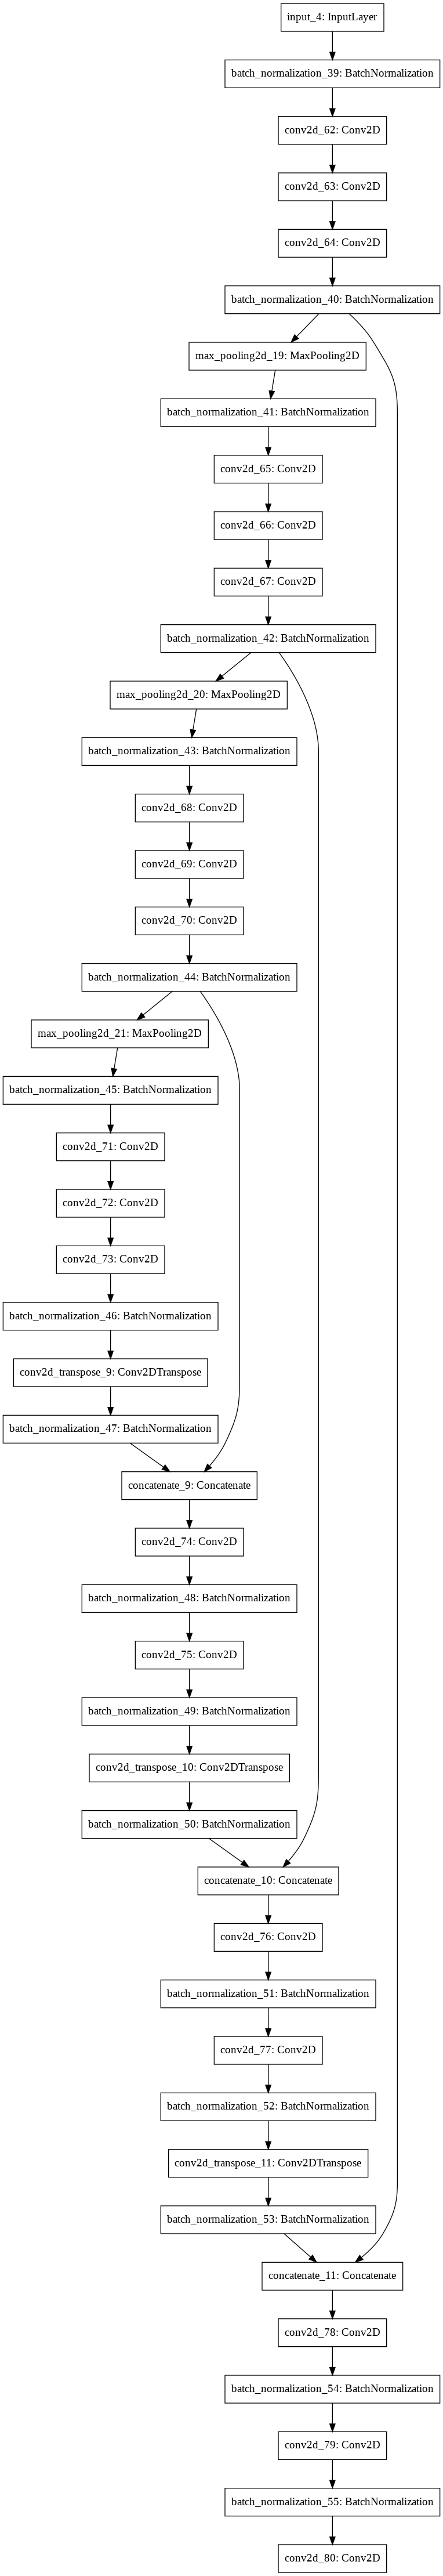

In [31]:
терра_ии.схема_модели(нейронка_2)

Эпоха №1  Время обучения: 5.48c  Точность на обучающей выборке: 81.54%       Точность на прверочной выборке: 78.35%
Эпоха №2  Время обучения: 2.99c  Точность на обучающей выборке: 82.78%       Точность на прверочной выборке: 80.05%
Эпоха №3  Время обучения: 2.99c  Точность на обучающей выборке: 84.17%       Точность на прверочной выборке: 79.72%
Эпоха №4  Время обучения: 2.88c  Точность на обучающей выборке: 84.41%       Точность на прверочной выборке: 80.44%
Эпоха №5  Время обучения: 2.88c  Точность на обучающей выборке: 85.37%       Точность на прверочной выборке: 78.9%
Эпоха №6  Время обучения: 3.0c   Точность на обучающей выборке: 85.19%       Точность на прверочной выборке: 81.31%
Эпоха №7  Время обучения: 2.88c  Точность на обучающей выборке: 86.62%       Точность на прверочной выборке: 81.56%
Эпоха №8  Время обучения: 3.0c   Точность на обучающей выборке: 86.37%       Точность на прверочной выборке: 80.17%
Эпоха №9  Время обучения: 2.89c  Точность на обучающей выборке: 87.12%   

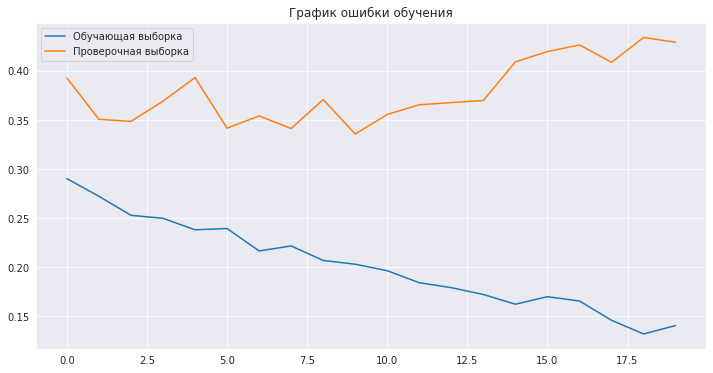

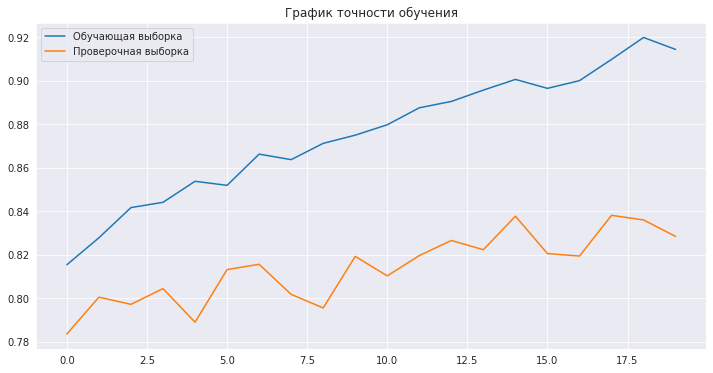

In [33]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка_2,
    обучающая_выборка, размеченная_обучающая_выборка,
    тестовая_выборка, размеченная_тестовая_выборка,
    размер_пакета = 18,
    количество_эпох =20)

**Точность UNET на проверочной выборке: 83.6%**

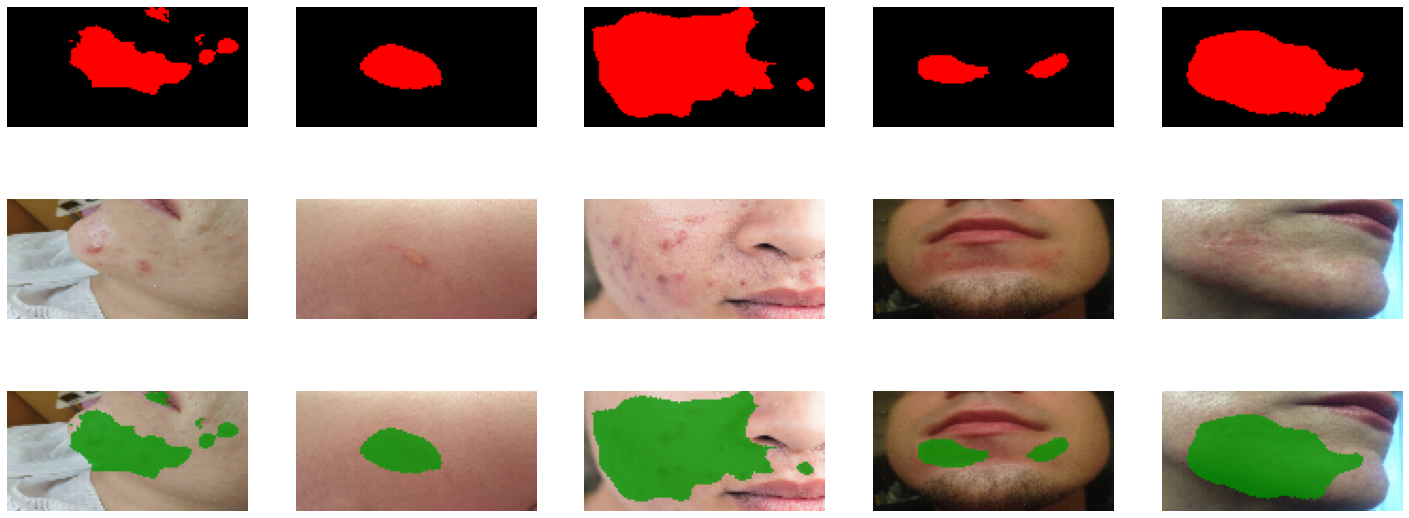

In [35]:
терра_ии.тест_модели_сегментации(
    нейронка_2,
    тестовые_изображения = тестовая_выборка
)

In [62]:
нейронка_3 = терра_ии.создать_PSP(
    количество_фильтров = 69,
    входной_размер = терра_ии.инициализировать_под_базу(обучающая_выборка),
    количество_блоков = 5
)

Создана модель нейронной сети!


Схема модели:


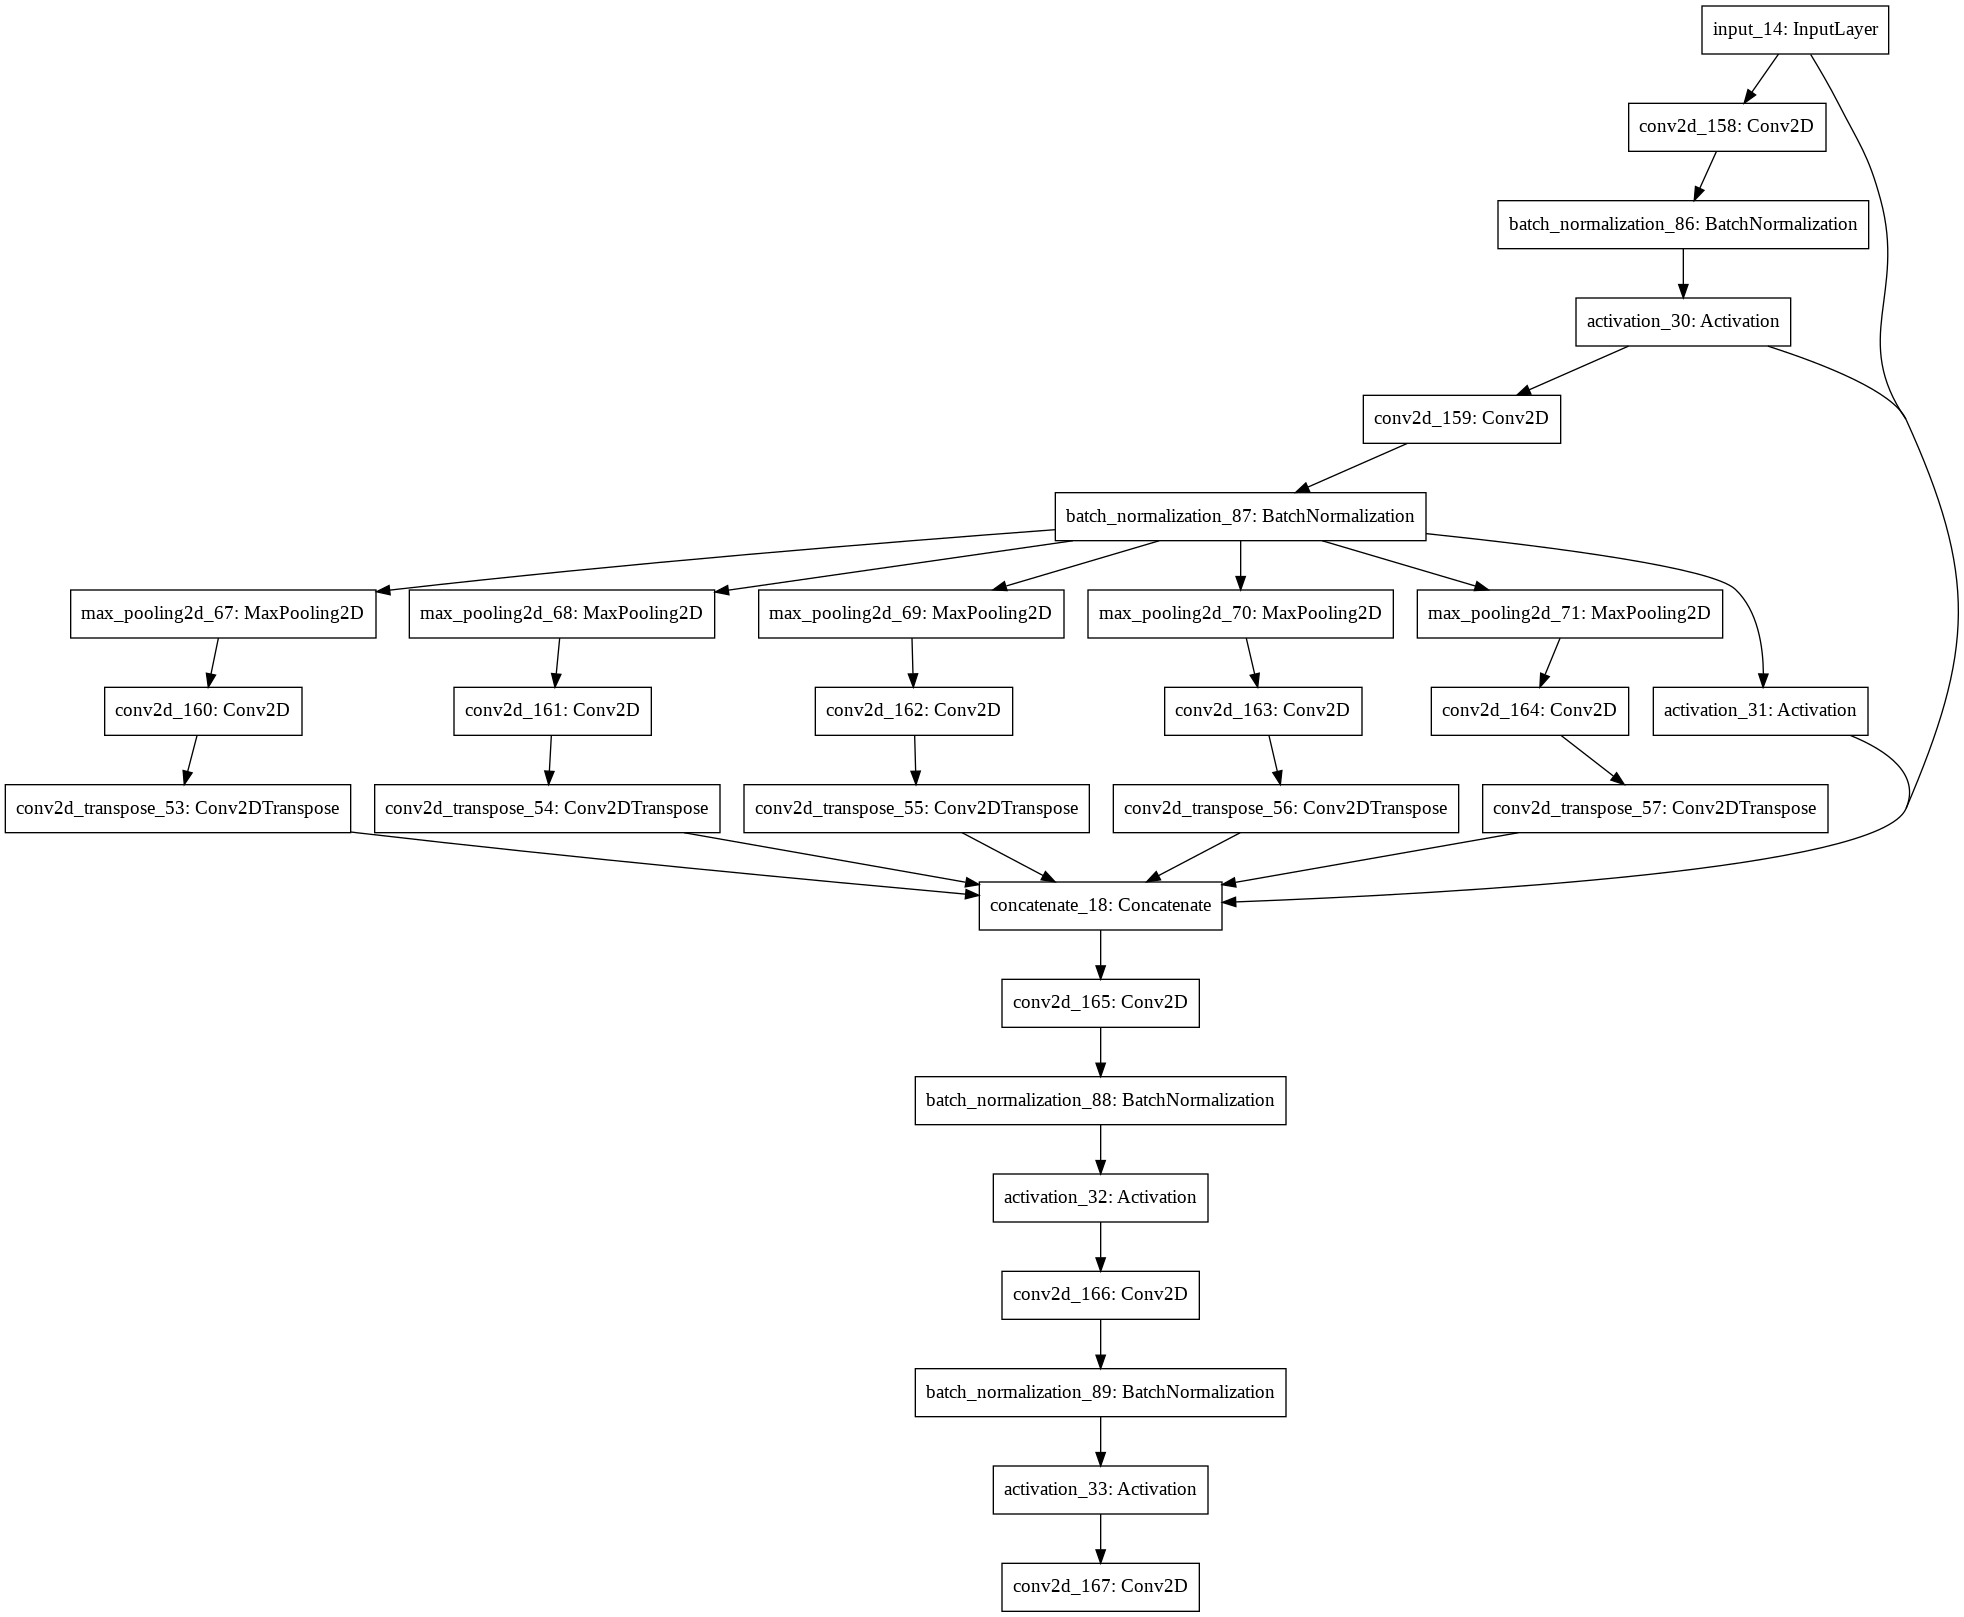

In [63]:
терра_ии.схема_модели(нейронка_3)

Эпоха №1  Время обучения: 3.78c  Точность на обучающей выборке: 75.25%       Точность на прверочной выборке: 76.27%
Эпоха №2  Время обучения: 2.78c  Точность на обучающей выборке: 75.97%       Точность на прверочной выборке: 75.22%
Эпоха №3  Время обучения: 2.78c  Точность на обучающей выборке: 76.78%       Точность на прверочной выборке: 72.32%
Эпоха №4  Время обучения: 2.85c  Точность на обучающей выборке: 77.42%       Точность на прверочной выборке: 75.01%
Эпоха №5  Время обучения: 2.86c  Точность на обучающей выборке: 77.49%       Точность на прверочной выборке: 72.69%
Эпоха №6  Время обучения: 2.85c  Точность на обучающей выборке: 77.93%       Точность на прверочной выборке: 75.44%
Эпоха №7  Время обучения: 2.8c   Точность на обучающей выборке: 77.8%        Точность на прверочной выборке: 77.2%
Эпоха №8  Время обучения: 2.79c  Точность на обучающей выборке: 78.79%       Точность на прверочной выборке: 76.7%
Эпоха №9  Время обучения: 2.79c  Точность на обучающей выборке: 79.38%    

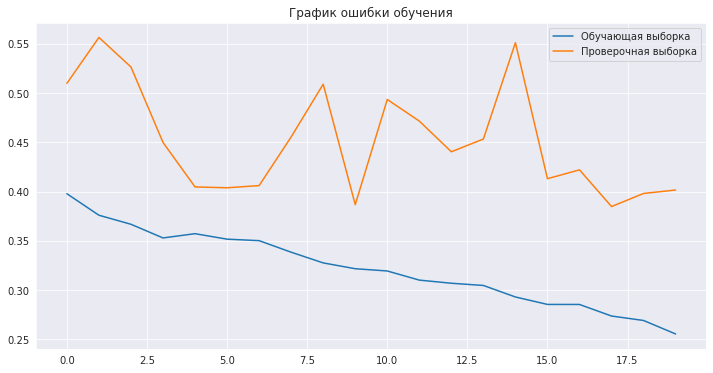

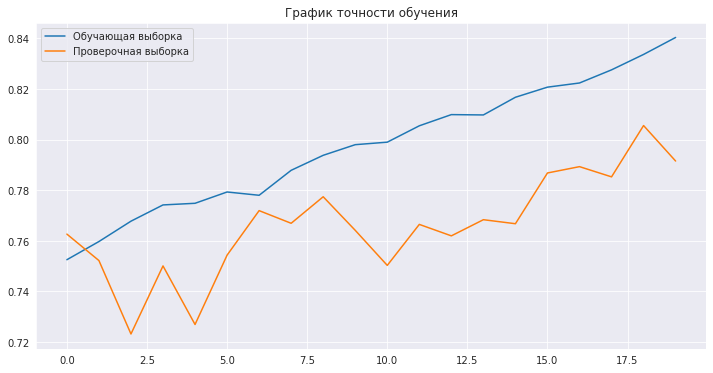

In [66]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка_3,
    обучающая_выборка, размеченная_обучающая_выборка,
    тестовая_выборка, размеченная_тестовая_выборка,
    размер_пакета = 7,
    количество_эпох = 20)

Точность PSPNet около **80**%.

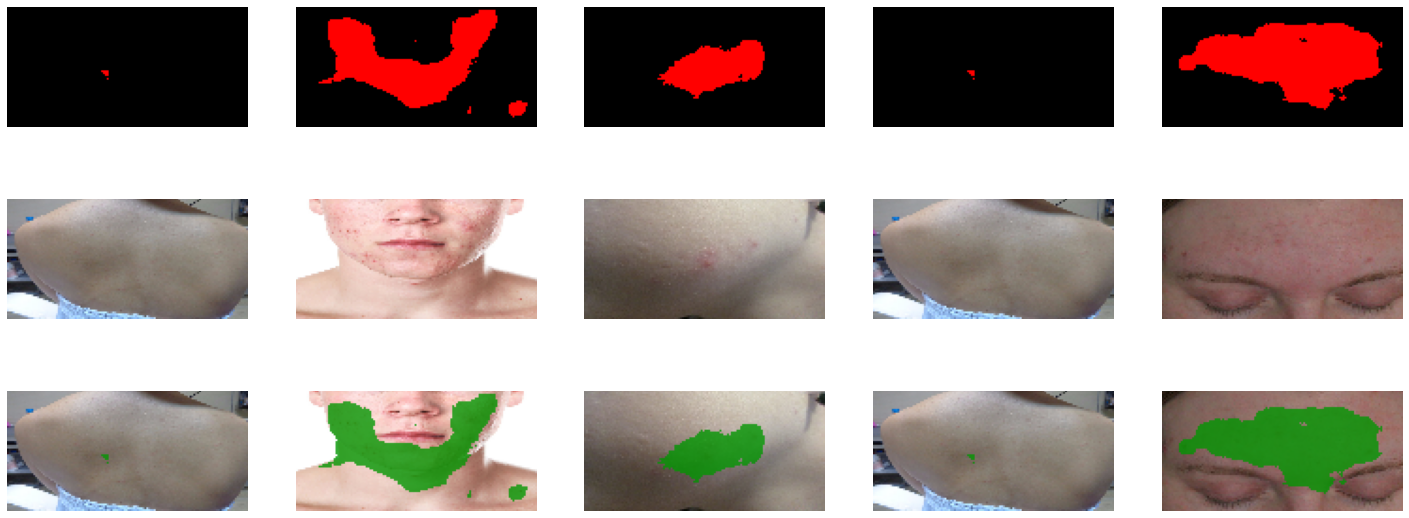

In [67]:
терра_ии.тест_модели_сегментации(
    нейронка_3,
    тестовые_изображения = тестовая_выборка
)

Итоги UNET перевзашла PSPNet на 3% точности. Хотя если дальше жксперементировать с количеством блоков и батчем, возможно добиться и более высоких резкльтов как с первой так и второй арзитектурой.